## Análise de Incêndios Florestais no Brasil de 1997-2017

In [ ]:
# Libs Necessárias

# Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

# Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [ ]:
# Lendo os dados
Base_Dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Case Incendios Florestais/Dados_Indendio.csv', encoding='latin-1')

# Verificando
Base_Dados.head() 

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [ ]:
# Análise por estado

def analiseEstado():
  # Agrupando por ano, mês e estado
  Analise_03 = Base_Dados.groupby(by=['state']).sum().reset_index()[['state', 'number']].sort_values('number', ascending = False) # [['state', 'number']] - pegando somente o state e o number

  # Estilo de gráfico
  plt.style.use('ggplot')

  # Titulo do gráfico
  plt.title('Estado com maior número de incêndios', loc='left', fontsize=25)

  # Plot gráfico
  plt.bar(Analise_03['state'], Analise_03['number'], color='#f44e3f') # Pode ser utilizado Analise_03.number ou Analise_03['number']

  # Label´s dos eixos x e y
  plt.xlabel('Estado', fontsize=25)
  plt.ylabel('Número de Incêndios', fontsize=25)

  # Rotação dos label´s do eixo x
  plt.xticks(rotation=90 );

In [ ]:
# Análise por ano e mês

def anoMes():
  # Agrupando por ano e mês
  Analise_02 = Base_Dados.groupby(by=['year', 'month']).sum().reset_index()

  # Estilo de gráfico
  plt.style.use('ggplot')

  # Titulo do gráfico
  plt.title('Incêndios no Brasil por mês', loc='left', fontsize=25)

  # Plot do gráfico
  sns.boxplot(data=Analise_02, x='month', y='number', palette='coolwarm', saturation=1, width=0.9, linewidth=2,
              order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])

  # Label´s dos eixos x e y
  plt.xlabel('Mês', fontsize=25)
  plt.ylabel('Número de Incêndios', fontsize=25);

In [ ]:
# Análise por ano

def ano():
  # Análise de incendios por ano
  Analise = Base_Dados.groupby( by=['year']).sum().reset_index() # reset_index() cria uma nova coluna ID, retira a serie temporal

  # Estilo de gráfico
  plt.style.use('ggplot')

  # Titulo do gráfico
  plt.title('Total de incêndios no Brasil: 1997 - 2017', loc='left', fontsize=25)

  # Plot do gráfico
  sns.lineplot(data=Analise, x='year', y='number', estimator='sum', lw=2, color='#ff5555', alpha=0.85)

  # Label´s dos eixos x e y
  plt.xlabel('Periodo', fontsize=25)
  plt.ylabel('Quantidade', fontsize=25);

In [ ]:
# Análise dos Top 10

def top10():
  Analise_03 = Base_Dados.groupby(by=['state']).sum().reset_index()[['state', 'number']].sort_values('number', ascending = False) # [['state', 'number']] - pegando somente o state e o number

  # Cria a lista dos TOP 10
  Lista_TOP10 = Analise_03['state'][0:10].values

  #-------------------------------------------------------------------------
  # Configuração do gráfico
  # Estilo de gráfico
  plt.style.use('ggplot')

  # Titulo do gráfico
  plt.title('TOP 10 estados com maior indice de incêndios', loc='left', fontsize=25)

#-------------------------------------------------------------------------
  # Plot gráfico
  for Coluna in Lista_TOP10:

    # Filtro dos estados TOP 10
    Filtro = Base_Dados.loc[ Base_Dados['state'] == Coluna]

    # Agruando os valores por ano
    Analise_Local = Filtro.groupby( by=['year'] ).sum().reset_index()

    # Plot gráfico
    sns.lineplot(data=Analise_Local, x='year', y='number', lw=2, alpha=0.85)

  # Label´s dos eixos x e y
  plt.xlabel('Período', fontsize=25)
  plt.ylabel('Número de Incêndios', fontsize=25)

    # Legendas
  plt.legend( Lista_TOP10, bbox_to_anchor=(1,0.98) );

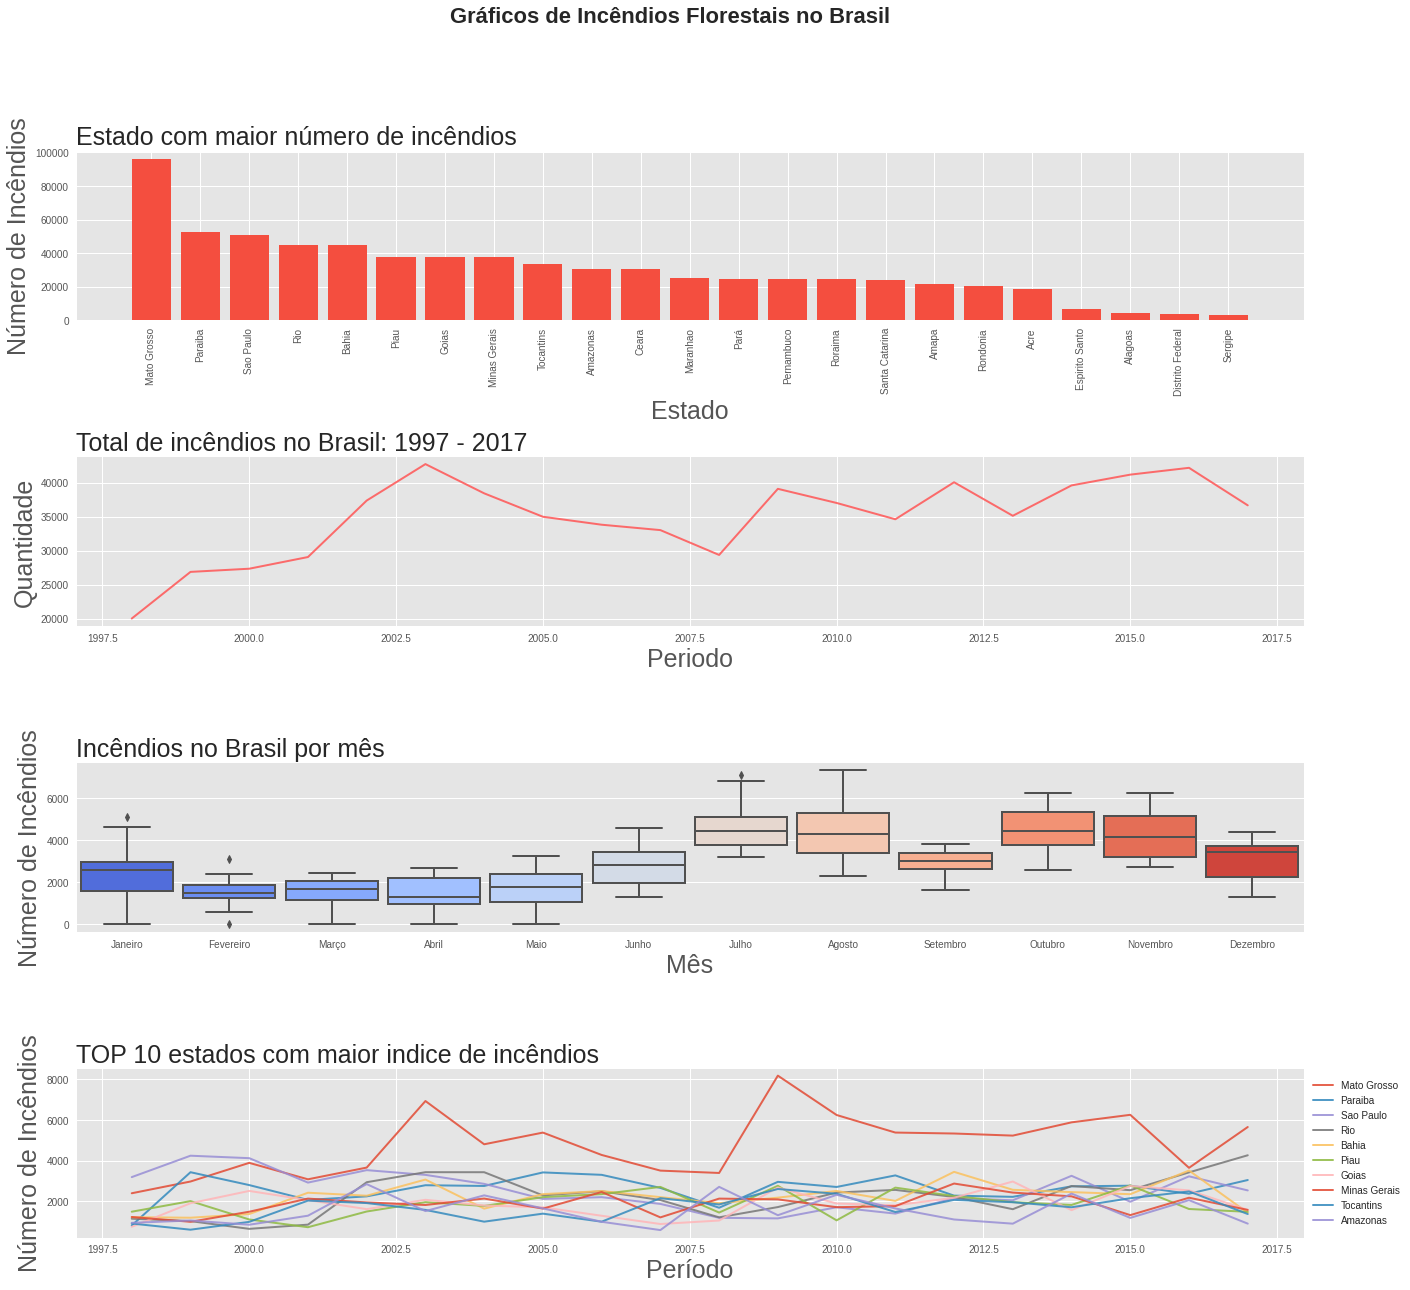

In [ ]:
# Dashboard

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure( figsize=(22, 20) )
fig.suptitle("Gráficos de Incêndios Florestais no Brasil", fontsize=22, fontweight=600)
spec2 = gridspec.GridSpec(ncols=2, nrows=4, hspace=0.8)

# -----------------------------------------------------------------------------------------------------------
# Gráfico por estado

fig.add_subplot(spec2[0, 0:])
analiseEstado()

# -----------------------------------------------------------------------------------------------------------
# Gráfico por ano

fig.add_subplot(spec2[1, 0:])
ano()

# -----------------------------------------------------------------------------------------------------------
# Gráfico por ano mês

fig.add_subplot(spec2[2, 0:])
anoMes()

# -----------------------------------------------------------------------------------------------------------
# Gráfico dos Top 10

fig.add_subplot(spec2[3, 0:])
top10()

# -----------------------------------------------------------------------------------------------------------
# Gráfico por mapa

Analise_03 = Base_Dados.groupby(by=['state']).sum().reset_index()[['state', 'number']].sort_values('number', ascending = False) # [['state', 'number']] - pegando somente o state e o number
Estados = Analise_03.sort_values('state')['state'].values
Valores = Analise_03.sort_values('state')['number'].values
Lat = [ -8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,	
        -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25 ]
Log = [ -70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,	
        -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]
Dicionario = {
  'Estados' : Estados,
  'Latitude' : Lat,
  'Longitude' : Log,
  'Incêndios' : Valores
}
Analise_Geografica = pd.DataFrame ( Dicionario )


px.density_mapbox(
    Analise_Geografica,
    lat='Latitude',
    lon='Longitude',
    z='Incêndios',
    radius=30,
    center=dict(lat=-12.700, lon=-46.5555),
    zoom=3,
    mapbox_style='stamen-terrain')

